In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df = pd.read_csv('walmart_dataset_PhD.csv')

In [4]:
# print the first 5 rows
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,No,No,No,0.46
1,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,No,No,No,0.46
2,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,No,No,No,0.46
3,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,Yes,Yes,No,0.46
4,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,Yes,No,Yes,0.46


In [5]:
# print out the shape of the dataset
df.shape

(46027957, 22)

In [6]:
#get some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       object 
 19  snap_TX       object 
 20  snap_WI       object 
 21  sell_price    float64
dtypes: float64(1), int64(5), object(16)
memory usage: 7.5+ GB


## Data Preprocessing

In [7]:
# summary statistics of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,46027957.0,1.427294,4.310440,0.00,0.00,0.00,1.00,763.00
wm_yr_wk,46027957.0,11373.480404,143.775567,11101.00,11243.00,11406.00,11511.00,11613.00
wday,46027957.0,3.996688,2.000825,1.00,2.00,4.00,6.00,7.00
month,46027957.0,6.398704,3.480230,1.00,3.00,6.00,9.00,12.00
year,46027957.0,2013.552382,1.470835,2011.00,2012.00,2014.00,2015.00,2016.00
sell_price,46027957.0,4.408089,3.403657,0.01,2.18,3.47,5.84,107.32


In [8]:
(df.isnull().sum()/len(df))*100

id               0.000000
item_id          0.000000
dept_id          0.000000
cat_id           0.000000
store_id         0.000000
state_id         0.000000
d                0.000000
sales            0.000000
date             0.000000
wm_yr_wk         0.000000
weekday          0.000000
wday             0.000000
month            0.000000
year             0.000000
event_name_1    91.990976
event_type_1    91.990976
event_name_2    99.794727
event_type_2    99.794727
snap_CA          0.000000
snap_TX          0.000000
snap_WI          0.000000
sell_price       0.000000
dtype: float64

There are missing values in the dataset. The values are all over 90 percent and will all be deleted.

In [9]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


In [10]:
x = df['sales']

# Calculate the correlations between x and all other variables in the dataset
correlations = df.corrwith(x)

# Print the correlations
print(correlations)

sales         1.000000
wm_yr_wk     -0.038909
wday         -0.032059
month        -0.004179
year         -0.038109
sell_price   -0.150920
dtype: float64


**Data Cleaning**

In [11]:
# drop the variables with over 90 percent missing values, and other categorical variables not needed.
df.drop(['id','item_id','dept_id','cat_id','store_id','wm_yr_wk','weekday','wday',
        'event_name_1','event_type_1','event_name_2','event_type_2','date'],axis=1,inplace=True)

In [12]:
df.head()

,state_id,d,sales,month,year,snap_CA,snap_TX,snap_WI,sell_price
0,CA,d_1,12,1,2011,No,No,No,0.46
1,CA,d_2,15,1,2011,No,No,No,0.46
2,CA,d_3,0,1,2011,No,No,No,0.46
3,CA,d_4,0,2,2011,Yes,Yes,No,0.46
4,CA,d_5,0,2,2011,Yes,No,Yes,0.46


**Feature Engineering**


I will create moving averages for 28 window period. 28 window period was chosen because the goal is to predict demand every 28 days. I will aslo create a total price variable.

In [13]:
#function to create a simple moving average, exponential moving average and cumulative moving average for a 30 window period from a daily energy consumption variable and return the dataframe plus the created variables

def create_moving_averages(df):
    # Simple Moving Average
    df['simple_moving_average']=df['sales'].rolling(window=28, min_periods=1).mean()
    
    # Exponential Moving Average
    df['exp_weighted_moving_average']=df['sales'].ewm(span=28).mean()
    
    # Cumulative Moving Average
    df['cum_moving_average']=df['sales'].expanding().mean()
    
    return df

df = create_moving_averages(df)

In [14]:
df['total_price'] = df['sales'] * df['sell_price']

In [15]:
df.head()

,state_id,d,sales,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price
0,CA,d_1,12,1,2011,No,No,No,0.46,12.00,12.000000,12.00,5.52
1,CA,d_2,15,1,2011,No,No,No,0.46,13.50,13.553571,13.50,6.90
2,CA,d_3,0,1,2011,No,No,No,0.46,9.00,8.709307,9.00,0.00
3,CA,d_4,0,2,2011,Yes,Yes,No,0.46,6.75,6.293346,6.75,0.00
4,CA,d_5,0,2,2011,Yes,No,Yes,0.46,5.40,4.848689,5.40,0.00


## MODEL DEVELOPMENT

The categorical values will be encoded using pandas factorize.

In [16]:
# Get a subset of the DataFrame containing only object variables
object_variables = df.select_dtypes(include=['object'])

# Get the column names of the object variables
object_columns = object_variables.columns.tolist()

# Print the column names of the object variables
print("Object variable columns:", object_columns)

Object variable columns: ['state_id', 'd', 'snap_CA', 'snap_TX', 'snap_WI']


In [17]:
df[['state_id', 'snap_CA', 'snap_TX', 'snap_WI']] = df[['state_id', 'snap_CA', 'snap_TX', 'snap_WI']].apply(lambda x: pd.factorize(x)[0])

In [18]:
df.head()

,state_id,d,sales,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price
0,0,d_1,12,1,2011,0,0,0,0.46,12.00,12.000000,12.00,5.52
1,0,d_2,15,1,2011,0,0,0,0.46,13.50,13.553571,13.50,6.90
2,0,d_3,0,1,2011,0,0,0,0.46,9.00,8.709307,9.00,0.00
3,0,d_4,0,2,2011,1,1,0,0.46,6.75,6.293346,6.75,0.00
4,0,d_5,0,2,2011,1,0,1,0.46,5.40,4.848689,5.40,0.00


**Create Train and Test Datasets**

Since the objective is to predict demand every 28 days, the last 28 days of sale will be extracted as the test data.

In [19]:
df['d'] = df.d.str.strip('d_') #remove the characters from the string and then convert object to numneric to enable extracting the test set

In [20]:
# this variable's data type will be changed to integer to enable the extraction of the test data

df['d'] = df['d'].astype('int64')

In [21]:

## downcasting loop
for column in df:
    if df[column].dtype == 'float64':
        df[column]=pd.to_numeric(df[column], downcast='float')
    if df[column].dtype == 'int64':
        df[column]=pd.to_numeric(df[column], downcast='integer')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46027957 entries, 0 to 46027956
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   state_id                     int8   
 1   d                            int16  
 2   sales                        int16  
 3   month                        int8   
 4   year                         int16  
 5   snap_CA                      int8   
 6   snap_TX                      int8   
 7   snap_WI                      int8   
 8   sell_price                   float32
 9   simple_moving_average        float32
 10  exp_weighted_moving_average  float32
 11  cum_moving_average           float32
 12  total_price                  float32
dtypes: float32(5), int16(3), int8(5)
memory usage: 1.3 GB


In [23]:
# function to create the train and test datasets

def extract_train_test_samples(df):
    # Get the minimum and maximum values of the 'd' column
    d_min = df['d'].min()
    d_max = df['d'].max()
    
    # Extract the test sample in the order of df[df['d'] >= d_max - 28]
    test_sample = df[df['d'] >= d_max - 28].sort_values(by='d')
    
    # Extract the train sample in the order of df[(df['d'] >= d_min) & (df['d'] < d_max - 28)]
    train_sample = df[(df['d'] >= d_min) & (df['d'] < d_max - 28)].sort_values(by='d')
    
    return train_sample, test_sample

train_sample, test_sample = extract_train_test_samples(df)

In [24]:
print(train_sample.head())
print(train_sample.shape)
print(test_sample.head())
print(test_sample.shape)

       state_id  d  sales  month  year  snap_CA  snap_TX  snap_WI  sell_price  \
0             0  1     12      1  2011        0        0        0        0.46   
31906         1  1      0      1  2011        0        0        0        3.67   
31899         1  1      0      1  2011        0        0        0       12.12   
31892         1  1      1      1  2011        0        0        0        2.57   
31885         1  1      1      1  2011        0        0        0        6.44   

       simple_moving_average  exp_weighted_moving_average  cum_moving_average  \
0                  12.000000                    12.000000           12.000000   
31906               0.892857                     0.709585            2.601843   
31899               0.750000                     0.653497            2.602226   
31892               1.035714                     0.929516            2.602734   
31885               1.428571                     1.313224            2.603243   

       total_price  
0    

The function below trains base models from the Random Forest and LightGBM algorithms and evaluated using cross-validation with 5 folds and hold out test data, after which they will be tuned using Economical Hyperparameter Optimization With Blended Search Strategy and same evaluation carried out.

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,cross_validate
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer, mean_absolute_error,mean_squared_error,r2_score

def evaluate_models(X, y):
    # define the X and y variables
    X = train_sample
    y = test_sample
    # create the train and test datasets
    X_train = train_sample.drop(['sales'],axis=1)
    y_train = train_sample['sales']
    X_test = test_sample.drop(['sales'],axis=1)
    y_test = test_sample['sales']
    
    
    lgb_model = LGBMRegressor(objective='regression',metric='mse',n_jobs=50)
    rf_model = RandomForestRegressor(n_jobs=50)
    
    
    # Perform 5-fold cross-validation using MAE, MSE, RMSE and R2 metric and printing their mean scores
     # Define the scorer dictionary
    
    scorer = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'R2': make_scorer(r2_score)
}
    
    lgb_scores = cross_validate(lgb_model, X_train,y_train, cv=5, scoring= scorer,n_jobs=50)
    rf_scores = cross_validate(rf_model, X_train,y_train, cv=5, scoring= scorer,n_jobs=50)
    
    
    # Compute mean scores and store in a pandas dataframe
    cross_val_avg  = pd.DataFrame({
        
    'LightGBM_MAE': lgb_scores['test_MAE'].mean(),
    'LightGBM_MSE': lgb_scores['test_MSE'].mean(),
    'LightGBM_RMSE': lgb_scores['test_RMSE'].mean(),
    'LightGBM_R2': lgb_scores['test_R2'].mean(),
    'Random Forest_MAE': rf_scores['test_MAE'].mean(),
    'Random Forest_MSE': rf_scores['test_MSE'].mean(),
    'Random Forest_RMSE': rf_scores['test_RMSE'].mean(),
    'Random Forest_R2': rf_scores['test_R2'].mean()
        
}, index=[0])
    
    # Perform 5-fold cross-validation using MSE metric
    
    score = make_scorer(mean_squared_error)
    lgb_scores = cross_val_score(lgb_model, X_train,y_train, cv=5, scoring=score,n_jobs=50)
    rf_scores = cross_val_score(rf_model, X_train,y_train, cv=5, scoring=score,n_jobs=50)
    
      # Save cross-validation scores to dataframe
    cross_val = pd.DataFrame({
        'LightGBM': lgb_scores,
        'Random Forest': rf_scores
    })
    

    
    # Fit models on the train dataset
    lgb_model.fit(X_train,y_train)
    rf_model.fit(X_train,y_train)
    

    # Make predictions on the test dataset
    y_pred_lgb = lgb_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_test)

    # Evaluate models with test data using MAE, MSE, RMSE, and R2 and save to dataframe
    eval_test_data = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'LightGBM': [mean_absolute_error(y_test, y_pred_lgb), 
                     mean_squared_error(y_test, y_pred_lgb), 
                     np.sqrt(mean_squared_error(y_test, y_pred_lgb)), 
                     r2_score(y_test, y_pred_lgb)],
        'Random Forest': [mean_absolute_error(y_test, y_pred_rf), 
                     mean_squared_error(y_test, y_pred_rf), 
                     np.sqrt(mean_squared_error(y_test, y_pred_rf)), 
                     r2_score(y_test, y_pred_rf)]
    })

    return cross_val_avg, cross_val, eval_test_data

cross_val_avg, cross_val, eval_test_data = evaluate_models(df.drop(columns=['sales']), df['sales'])

In [26]:
cross_val_avg

,LightGBM_MAE,LightGBM_MSE,LightGBM_RMSE,LightGBM_R2,Random Forest_MAE,Random Forest_MSE,Random Forest_RMSE,Random Forest_R2
0,0.050048,0.535113,0.702368,0.973519,0.000956,0.017899,0.126221,0.999107


In [27]:
cross_val

,LightGBM,Random Forest
0,0.943478,0.027485
1,0.778483,0.020626
2,0.502658,0.015593
3,0.211330,0.002369
4,0.239615,0.007105


In [28]:
eval_test_data

,Metric,LightGBM,Random Forest
0,MAE,0.046438,0.000290
1,MSE,0.191209,0.000690
2,RMSE,0.437274,0.026276
3,R2,0.985490,0.999948


The models did not overfit judging from the cross-validation scores. Hyperparameter tuning will be conducted on the models to see if improved accuracy will be achieved.

## LightGBM Tuning

In [30]:
from flaml import AutoML

def tune_lightgbm(X, y):
    
    # define the X and y variables
    X = train_sample
    y = test_sample
    # create the train and test datasets
    X_train = train_sample.drop(['sales'],axis=1)
    y_train = train_sample['sales']
    X_test = test_sample.drop(['sales'],axis=1)
    y_test = test_sample['sales']
    
    # define the optimization function
    lgb_tune = AutoML()
    

    # define the setting for optimization
    
    settings = {
    "time_budget": 54000,  # total running time in seconds
    "metric": 'mse',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['lgbm'],  # list of ML learners; we tune lightgbm in this example
    "task": 'regression'  # task type  

}

    
    
    
    # run flaml optimization to find the best hyperparameters for the lightgbm
    lgb_tune.fit(X_train, y_train,**settings,n_jobs=50,early_stop=True,hpo_method='bs',eval_method='cv',n_splits=5)
    
    # return the best hyperparameters and the best score
    return lgb_tune.best_config

best_config = tune_lightgbm(df.drop(columns=['sales']), df['sales'])

[flaml.automl.logger: 07-12 22:18:25] {1693} INFO - task = regression
[flaml.automl.logger: 07-12 22:18:25] {1700} INFO - Data split method: uniform
[flaml.automl.logger: 07-12 22:18:25] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-12 22:18:51] {1801} INFO - Minimizing error metric: mse
[flaml.automl.logger: 07-12 22:18:51] {1911} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 07-12 22:18:51] {2221} INFO - iteration 0, current learner lgbm


You passed a `space` parameter to OptunaSearch that contained unresolved search space definitions. OptunaSearch should however be instantiated with fully configured search spaces only. To use Ray Tune's automatic search space conversion, pass the space definition as part of the `config` argument to `tune.run()` instead.
[I 2023-07-12 22:18:51,017] A new study created in memory with name: optuna


[flaml.automl.logger: 07-12 22:22:04] {2347} INFO - Estimated sufficient time budget=1935144s. Estimated necessary time budget=1935s.
[flaml.automl.logger: 07-12 22:22:04] {2394} INFO -  at 345.7s,	estimator lgbm's best error=12.5757,	best estimator lgbm's best error=12.5757
[flaml.automl.logger: 07-12 22:22:04] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 07-12 22:25:18] {2394} INFO -  at 540.2s,	estimator lgbm's best error=12.5757,	best estimator lgbm's best error=12.5757
[flaml.automl.logger: 07-12 22:25:18] {2221} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 07-12 22:28:35] {2394} INFO -  at 736.4s,	estimator lgbm's best error=7.1176,	best estimator lgbm's best error=7.1176
[flaml.automl.logger: 07-12 22:28:35] {2221} INFO - iteration 3, current learner lgbm
[flaml.automl.logger: 07-12 22:32:02] {2394} INFO -  at 944.0s,	estimator lgbm's best error=1.7381,	best estimator lgbm's best error=1.7381
[flaml.automl.logger: 07-12 22:32:02] {2221}

[flaml.automl.logger: 07-13 03:38:20] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 07-13 04:43:42] {2394} INFO -  at 23244.1s,	estimator lgbm's best error=0.0588,	best estimator lgbm's best error=0.0588
[flaml.automl.logger: 07-13 04:43:42] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 07-13 04:49:14] {2394} INFO -  at 23575.6s,	estimator lgbm's best error=0.0588,	best estimator lgbm's best error=0.0588
[flaml.automl.logger: 07-13 04:49:14] {2221} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 07-13 05:19:28] {2394} INFO -  at 25390.0s,	estimator lgbm's best error=0.0562,	best estimator lgbm's best error=0.0562
[flaml.automl.logger: 07-13 05:19:28] {2221} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 07-13 05:34:37] {2394} INFO -  at 26298.4s,	estimator lgbm's best error=0.0562,	best estimator lgbm's best error=0.0562
[flaml.automl.logger: 07-13 05:34:37] {2221} INFO - iteration 40, current learner lg

In [31]:
best_config

{'n_estimators': 4641,
 'num_leaves': 17,
 'min_child_samples': 9,
 'learning_rate': 0.04057886825523183,
 'log_max_bin': 10,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.00770959807729146,
 'reg_lambda': 0.05173294676341311}

**The lightgbm model will be retrained using the tuned paramaters, and cross-validation and hold-out data evaluation will be done.**

In [32]:
def evaluate_models(X, y):
    # re-define the X and y variables
    X = train_sample
    y = test_sample
    # create the train and test datasets
    X_train = train_sample.drop(['sales'],axis=1)
    y_train = train_sample['sales']
    X_test = test_sample.drop(['sales'],axis=1)
    y_test = test_sample['sales']
    
    #re-define the model function with the tuned hyperparameter
    lgb_model_tuned = LGBMRegressor(learning_rate=0.04057886825523183, max_bin=1023,
                                    min_child_samples=9, n_estimators=4641, n_jobs=50, num_leaves=17,
                                    reg_alpha=0.00770959807729146, reg_lambda=0.05173294676341311,
                                    verbose=-1,objective='regression',metric='mse')
    
    
    
    # Perform 5-fold cross-validation using MAE, MSE, RMSE and R2 metric and printing their mean scores
     # Define the scorer dictionary
    
    scorer = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'R2': make_scorer(r2_score)
}

    lgb_scores = cross_validate(lgb_model_tuned, X_train,y_train, cv=5, scoring= scorer,n_jobs=50)
    
    
    
    # Compute mean scores and store in a pandas dataframe
    cross_val_avg  = pd.DataFrame({
        
    'MAE': lgb_scores['test_MAE'].mean(),
    'MSE': lgb_scores['test_MSE'].mean(),
    'RMSE': lgb_scores['test_RMSE'].mean(),
    'R2': lgb_scores['test_R2'].mean()

        
}, index=[0])
    
    # Perform 5-fold cross-validation using MSE metric
    
    score = make_scorer(mean_squared_error)
    lgb_scores = cross_val_score(lgb_model_tuned, X_train,y_train, cv=5, scoring=score,n_jobs=50)
    
      # Save cross-validation scores to dataframe
    cross_val = pd.DataFrame({
        'LightGBM': lgb_scores
    })
    

    
    # Fit models on the train dataset
    lgb_model_tuned.fit(X_train,y_train)

    

    # Make predictions on the test dataset
    y_pred_lgb = lgb_model_tuned.predict(X_test)
    

    # Evaluate models with test data using MAE, MSE, RMSE, and R2 and save to dataframe
    eval_test_data = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'LightGBM': [mean_absolute_error(y_test, y_pred_lgb), 
                     mean_squared_error(y_test, y_pred_lgb), 
                     np.sqrt(mean_squared_error(y_test, y_pred_lgb)), 
                     r2_score(y_test, y_pred_lgb)]
    })

    return cross_val_avg, cross_val, eval_test_data

cross_val_avg, cross_val, eval_test_data = evaluate_models(df.drop(columns=['sales']), df['sales'])

In [33]:
cross_val_avg

,MAE,MSE,RMSE,R2
0,0.009177,0.077312,0.256531,0.996349


In [34]:
cross_val

,LightGBM
0,0.166571
1,0.125820
2,0.033597
3,0.015332
4,0.045238


In [35]:
eval_test_data

,Metric,LightGBM
0,MAE,0.008312
1,MSE,0.009737
2,RMSE,0.098676
3,R2,0.999261


The tuned lightgbm model has an improved accuracy significantly and did not overfit judging by the cross-validation evaluations. The tuned model will be used to build the stacking ensemble.

## RandomForest Tuning

In [36]:
def tune_randomforest(X, y):
    
    # define the X and y variables
    X = train_sample
    y = test_sample
    # create the train and test datasets
    X_train = train_sample.drop(['sales'],axis=1)
    y_train = train_sample['sales']
    X_test = test_sample.drop(['sales'],axis=1)
    y_test = test_sample['sales']
    
    # define the optimization function
    rf_tune = AutoML()
    

    # define the setting for optimization
    
    settings = {
    "time_budget": 54000,  # total running time in seconds
    "metric": 'mse',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['rf'],  # list of ML learners; we tune random forest in this experiment
    "task": 'regression' # task type  

}

    
    
    
    # run flaml optimization to find the best hyperparameters for the random forest
    rf_tune.fit(X_train, y_train,**settings,n_jobs=50,early_stop=True,hpo_method='bs',eval_method='cv',n_splits=5)
    
    # return the best hyperparameters and the best score
    return rf_tune.best_config

best_config = tune_randomforest(df.drop(columns=['sales']), df['sales'])

[flaml.automl.logger: 07-13 23:15:55] {1693} INFO - task = regression
[flaml.automl.logger: 07-13 23:15:55] {1700} INFO - Data split method: uniform
[flaml.automl.logger: 07-13 23:15:55] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-13 23:16:21] {1801} INFO - Minimizing error metric: mse
[flaml.automl.logger: 07-13 23:16:21] {1911} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 07-13 23:16:21] {2221} INFO - iteration 0, current learner rf


You passed a `space` parameter to OptunaSearch that contained unresolved search space definitions. OptunaSearch should however be instantiated with fully configured search spaces only. To use Ray Tune's automatic search space conversion, pass the space definition as part of the `config` argument to `tune.run()` instead.
[I 2023-07-13 23:16:21,453] A new study created in memory with name: optuna


[flaml.automl.logger: 07-13 23:24:30] {2347} INFO - Estimated sufficient time budget=4885896s. Estimated necessary time budget=4886s.
[flaml.automl.logger: 07-13 23:24:30] {2394} INFO -  at 642.8s,	estimator rf's best error=8.9506,	best estimator rf's best error=8.9506
[flaml.automl.logger: 07-13 23:24:30] {2221} INFO - iteration 1, current learner rf
[flaml.automl.logger: 07-13 23:37:07] {2394} INFO -  at 1400.7s,	estimator rf's best error=2.2522,	best estimator rf's best error=2.2522
[flaml.automl.logger: 07-13 23:37:07] {2221} INFO - iteration 2, current learner rf
[flaml.automl.logger: 07-13 23:51:29] {2394} INFO -  at 2262.4s,	estimator rf's best error=2.2522,	best estimator rf's best error=2.2522
[flaml.automl.logger: 07-13 23:51:29] {2221} INFO - iteration 3, current learner rf
[flaml.automl.logger: 07-14 00:08:57] {2394} INFO -  at 3310.2s,	estimator rf's best error=0.5353,	best estimator rf's best error=0.5353
[flaml.automl.logger: 07-14 00:08:57] {2221} INFO - iteration 4, cu

[flaml.automl.logger: 07-14 13:50:07] {1942} INFO - Time taken to find the best model: 35689.10792303085


In [37]:
best_config

{'n_estimators': 45, 'max_features': 0.8334539505729306, 'max_leaves': 13325}

**The random forest model will be retrained using the tuned paramaters, and cross-validation and hold-out data evaluation will be done.**

In [38]:
def evaluate_models(X, y):
    # define the X and y variables
    X = train_sample
    y = test_sample
    # create the train and test datasets
    X_train = train_sample.drop(['sales'],axis=1)
    y_train = train_sample['sales']
    X_test = test_sample.drop(['sales'],axis=1)
    y_test = test_sample['sales']
    
    

    rf_model_tuned = RandomForestRegressor(max_features=0.8334539505729306, max_leaf_nodes=13325,
                                            n_estimators=45, n_jobs=50, random_state=12032022)
    
    
    # Perform 5-fold cross-validation using MAE, MSE, RMSE and R2 metric and printing their mean scores
     # Define the scorer dictionary
    
    scorer = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'R2': make_scorer(r2_score)
}
    

    rf_scores = cross_validate(rf_model_tuned, X_train,y_train, cv=5, scoring= scorer,n_jobs=50)
    
    
    # Compute mean scores and store in a pandas dataframe
    cross_val_avg  = pd.DataFrame({
    'MAE': rf_scores['test_MAE'].mean(),
    'MSE': rf_scores['test_MSE'].mean(),
    'RMSE': rf_scores['test_RMSE'].mean(),
    'R2': rf_scores['test_R2'].mean()
        
}, index=[0])
    
    # Perform 5-fold cross-validation using MSE metric
    
    score = make_scorer(mean_squared_error)
    rf_scores = cross_val_score(rf_model_tuned, X_train,y_train, cv=5, scoring=score,n_jobs=50)
      # Save cross-validation scores to dataframe
    cross_val = pd.DataFrame({
        'Random Forest': rf_scores
    })
    

    
    # Fit models on the train dataset
    rf_model_tuned.fit(X_train,y_train)
    

    # Make predictions on the test dataset
    y_pred_rf = rf_model_tuned.predict(X_test)

    # Evaluate models with test data using MAE, MSE, RMSE, and R2 and save to dataframe
    eval_test_data = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Random Forest': [mean_absolute_error(y_test, y_pred_rf), 
                     mean_squared_error(y_test, y_pred_rf), 
                     np.sqrt(mean_squared_error(y_test, y_pred_rf)), 
                     r2_score(y_test, y_pred_rf)]
    })

    return cross_val_avg, cross_val, eval_test_data

cross_val_avg, cross_val, eval_test_data = evaluate_models(df.drop(columns=['sales']), df['sales'])

In [39]:
cross_val_avg

,MAE,MSE,RMSE,R2
0,0.001159,0.015033,0.111101,0.999312


In [40]:
cross_val

,Random Forest
0,0.037394
1,0.016963
2,0.014537
3,0.002444
4,0.003830


In [41]:
eval_test_data

,Metric,Random Forest
0,MAE,0.000641
1,MSE,0.001102
2,RMSE,0.033202
3,R2,0.999916


The tuned random forest model did not improve the accuracy. The pre-tuned model will be used to build the stacking ensemble.

## Stacking Ensemble Training

The experiment will allow the final estimator train the base predictions with the original dataset

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,cross_validate
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import make_scorer, mean_absolute_error,mean_squared_error,r2_score

def evaluate_stack(X, y):
    # re-define the X and y variables
    X = train_sample
    y = test_sample
    # create the train and test datasets
    X_train = train_sample.drop(['sales'],axis=1)
    y_train = train_sample['sales']
    X_test = test_sample.drop(['sales'],axis=1)
    y_test = test_sample['sales']
    
    #re-define the model functions with the tuned hyperparameter
    lgb_model_tuned = LGBMRegressor(learning_rate=0.04057886825523183, max_bin=1023,
                                    min_child_samples=9, n_estimators=4641, n_jobs=60, num_leaves=17,
                                    reg_alpha=0.00770959807729146, reg_lambda=0.05173294676341311,
                                    verbose=-1,objective='regression',metric='mse')
    
    rf_model = RandomForestRegressor(n_jobs=60)
    
    extratree = ExtraTreesRegressor(n_jobs=60)
    
    estimators = [('LightGBM', lgb_model_tuned),('Random Forest', rf_model)]
    
    #define the stacked model function
    stacked_model = StackingRegressor(estimators=estimators,
                                       final_estimator=extratree,passthrough=True,n_jobs=60)
    
    
     # Perform 5-fold cross-validation using MAE, MSE, RMSE and R2 metric and printing their mean scores
     # Define the scorer dictionary
    
    scorer = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'R2': make_scorer(r2_score)
}

    stacked_scores = cross_validate(stacked_model, X_train,y_train, cv=5, scoring= scorer,n_jobs=60)
    
    
    
    # Compute mean scores and store in a pandas dataframe
    cross_val_avg  = pd.DataFrame({
        
    'MAE': stacked_scores['test_MAE'].mean(),
    'MSE': stacked_scores['test_MSE'].mean(),
    'RMSE': stacked_scores['test_RMSE'].mean(),
    'R2': stacked_scores['test_R2'].mean()

        
}, index=[0])
    
    # Perform 5-fold cross-validation using MSE metric
    
    score = make_scorer(mean_squared_error)
    stacked_scores = cross_val_score(stacked_model, X_train,y_train, cv=5, scoring=score,n_jobs=60)
    
      # Save cross-validation scores to dataframe
    cross_val = pd.DataFrame({
        'Stacked_ensemble': stacked_scores
    })
    
    return cross_val_avg, cross_val

cross_val_avg, cross_val = evaluate_stack(df.drop(columns=['sales']), df['sales'])
    
    

In [26]:
cross_val_avg

,MAE,MSE,RMSE,R2
0,0.000973,0.014936,0.107131,0.999339


In [27]:
cross_val

,Stacked_ensemble
0,0.038171
1,0.014401
2,0.013652
3,0.001904
4,0.002962


The stacked ensemble with the final estimator training the base predictions with the original dataset did not overfit and outperformed the individual base learners based on the cross-validation evaluation.

## Evaluate with hold-out dataset

In [28]:
 #re-define the model functions with the tuned hyperparameter
lgb_model_tuned =  LGBMRegressor(learning_rate=0.04057886825523183, max_bin=1023,
                                    min_child_samples=9, n_estimators=4641, n_jobs=60, num_leaves=17,
                                    reg_alpha=0.00770959807729146, reg_lambda=0.05173294676341311,
                                    verbose=-1,objective='regression',metric='mse')

In [29]:
rf_model = RandomForestRegressor(n_jobs=60)

In [30]:
estimators = [('LightGBM', lgb_model_tuned),('Random Forest', rf_model)]

extratree = ExtraTreesRegressor(n_jobs=50)

#define the stacked model function
stacked_model = StackingRegressor(estimators=estimators,
                                       final_estimator=extratree,passthrough=True,n_jobs=50)
    

In [31]:
    # re-define the X and y variables
X = train_sample
y = test_sample
    # create the train and test datasets
X_train = train_sample.drop(['sales'],axis=1)
y_train = train_sample['sales']
X_test = test_sample.drop(['sales'],axis=1)
y_test = test_sample['sales']

In [32]:
stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('LightGBM',
                               LGBMRegressor(learning_rate=0.04057886825523183,
                                             max_bin=1023, metric='mse',
                                             min_child_samples=9,
                                             n_estimators=4641, n_jobs=60,
                                             num_leaves=17,
                                             objective='regression',
                                             reg_alpha=0.00770959807729146,
                                             reg_lambda=0.05173294676341311,
                                             verbose=-1)),
                              ('Random Forest',
                               RandomForestRegressor(n_jobs=60))],
                  final_estimator=ExtraTreesRegressor(n_jobs=50), n_jobs=50,
                  passthrough=True)

In [33]:
pred = stacked_model.predict(X_test)

In [34]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred)))
print('R-squared: ',r2_score(y_test,pred))

MAE: 0.0003444317526379482
MSE: 0.00041538446749075475
RMSE: 0.020380982986371258
R-squared:  0.9999684772854547


The evaluation of the stacked model using the hold-out data outperformed the individual base learners significantly. It's performance will now be compared with the MLP model.

**Evaluation on Train data**

In [38]:
pred2 = stacked_model.predict(X_train)

In [39]:
print('MAE:', mean_absolute_error(y_train, pred2))
print('MSE:', mean_squared_error(y_train, pred2))
print('RMSE:',np.sqrt(mean_squared_error(y_train, pred2)))
print('R-squared: ',r2_score(y_train,pred2))

MAE: 0.00020514446884526625
MSE: 0.0011735364124736871
RMSE: 0.0342569177316595
R-squared:  0.9999371959716233


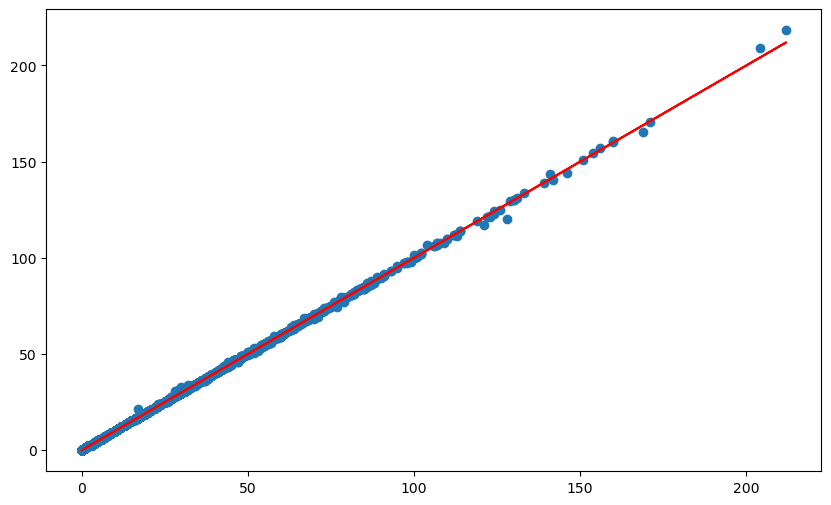

In [35]:
# Our predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

The scatterplot shows a good regression model. The regression line cuts across almost the entire datapoints.

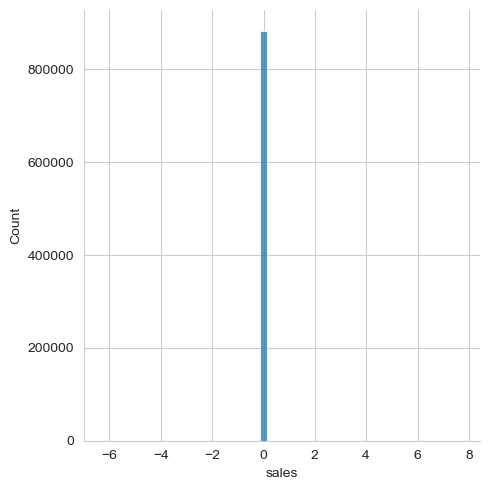

In [36]:
sns.set_style('whitegrid')
sns.displot((y_test-pred),bins=50) # plot a residual histogram by passing the y_test-predictions

## Save the model

In [37]:
import joblib

# Save the model as a pickle in a file
filename = 'STACKED_ENSEMBLE_MODEL_PHD2.pkl'
joblib.dump(stacked_model, filename)

['STACKED_ENSEMBLE_MODEL_PHD2.pkl']

In [55]:
test_sample.head() # the hold-out dataset will saved for evaluation of the frameworks

,state_id,d,sales,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price
45113258,0,1885,1,3,2016,0,0,0,8.26,1.071429,1.392841,1.427775,8.26
45282441,2,1885,1,3,2016,0,0,0,2.68,1.357143,1.007385,1.427358,2.68
45172254,0,1885,5,3,2016,0,0,0,1.00,0.892857,1.434569,1.427874,5.00
45172261,0,1885,17,3,2016,0,0,0,2.48,1.928571,3.061044,1.427875,42.16
45282434,2,1885,0,3,2016,0,0,0,1.98,1.607143,1.349851,1.427358,0.00


In [56]:
test_sample.to_csv('holdout_sample_PHD.csv', index=False)